<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/83_C_DOE_DCGL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
#!pip install bioinfokit
from bioinfokit.analys import stat
#!pip install pingouin
import pingouin as pg

#  **Tema 5: Diseños Cuadrados Greco - Latinos - DCGL usando Python: Versión 2**

###  **Ejemplo. Se compara el rendimiento de tres procesos de fabricación (A, B, C) en tres condiciones experimentales ($\alpha$, $\beta$,$\gamma$) tres días distintos con tres procedimientos de medición. El diseño y los resultados obtenidos se indican en el cuadro. El número entre paréntesis en cada casilla es la media de las dos replicaciones.**


|Método \ Dia|	Dia 1	|Dia 2|Dia 3|
|:--:|:--:|:--:|:--:|
|Método 1	|A$\alpha$=25, 25|	B$\beta$=15,20 |	C$\gamma$=20,25 |
|Método 2	|C$\beta$=25,10|	A$\gamma$=30, 20|	B$\alpha$=35, 50|
|Método 3	|B$\gamma$=40, 40|	C$\alpha$=35, 45	|A$\beta$=30, 15|


* **¿Existen diferencias en los diferentes tres procesos de fabricación?**
* **¿Existen diferencias en las diferentes tres condiciones experimentales?**


## **5.1 Los Datos del Problema**

In [ ]:
## **4.1 Los Datos del Problema**
Metodos  =   ["Metodo_1", "Metodo_2", "Metodo_3"]
Dias  =  ["Dia_1","Dia_2", "Dia_3"]
Procesos = ["A", "B", "C","C","A", "B", "B", "C", "A", "A", "B", "C","C","A", "B", "B", "C", "A"]
Condiciones =['Alfa', 'Beta', 'Gamma',  'Beta', 'Gamma','Alfa', 'Gamma','Alfa', 'Beta', 'Alfa', 'Beta', 'Gamma',  'Beta', 'Gamma','Alfa', 'Gamma','Alfa', 'Beta']
Rendimiento =[25, 15, 20, 25, 30, 35, 40, 35, 30, 25, 20, 25, 10, 20, 50, 40, 45, 15]

## **5.2 Construyamos el dataFrame de los precios y productos**

In [ ]:
## **5.2 Construyamos el dataFrame de los precios y productos**
DCGL = pd.DataFrame({'Metodos':np.repeat(['Metodo_1', 'Metodo_2', 'Metodo_3','Metodo_1', 'Metodo_2', 'Metodo_3' ],3), 'Dias':Dias*6, 'Procesos':Procesos, 'Condiciones':Condiciones, 'Rendimiento':Rendimiento})


## **5.3 Veamos el DataFrame**

In [ ]:
## **5.3 Veamos el DataFrame**
DCGL

,Metodos,Dias,Procesos,Condiciones,Rendimiento
0,Metodo_1,Dia_1,A,Alfa,25
1,Metodo_1,Dia_2,B,Beta,15
2,Metodo_1,Dia_3,C,Gamma,20
3,Metodo_2,Dia_1,C,Beta,25
4,Metodo_2,Dia_2,A,Gamma,30
5,Metodo_2,Dia_3,B,Alfa,35
6,Metodo_3,Dia_1,B,Gamma,40
7,Metodo_3,Dia_2,C,Alfa,35
8,Metodo_3,Dia_3,A,Beta,30
9,Metodo_1,Dia_1,A,Alfa,25


## **5.5. BoxPlot para DCL - TGP múltiple**

<Axes: title={'center': 'Rendimiento vs Dias'}, xlabel='Dias', ylabel='Rendimiento'>

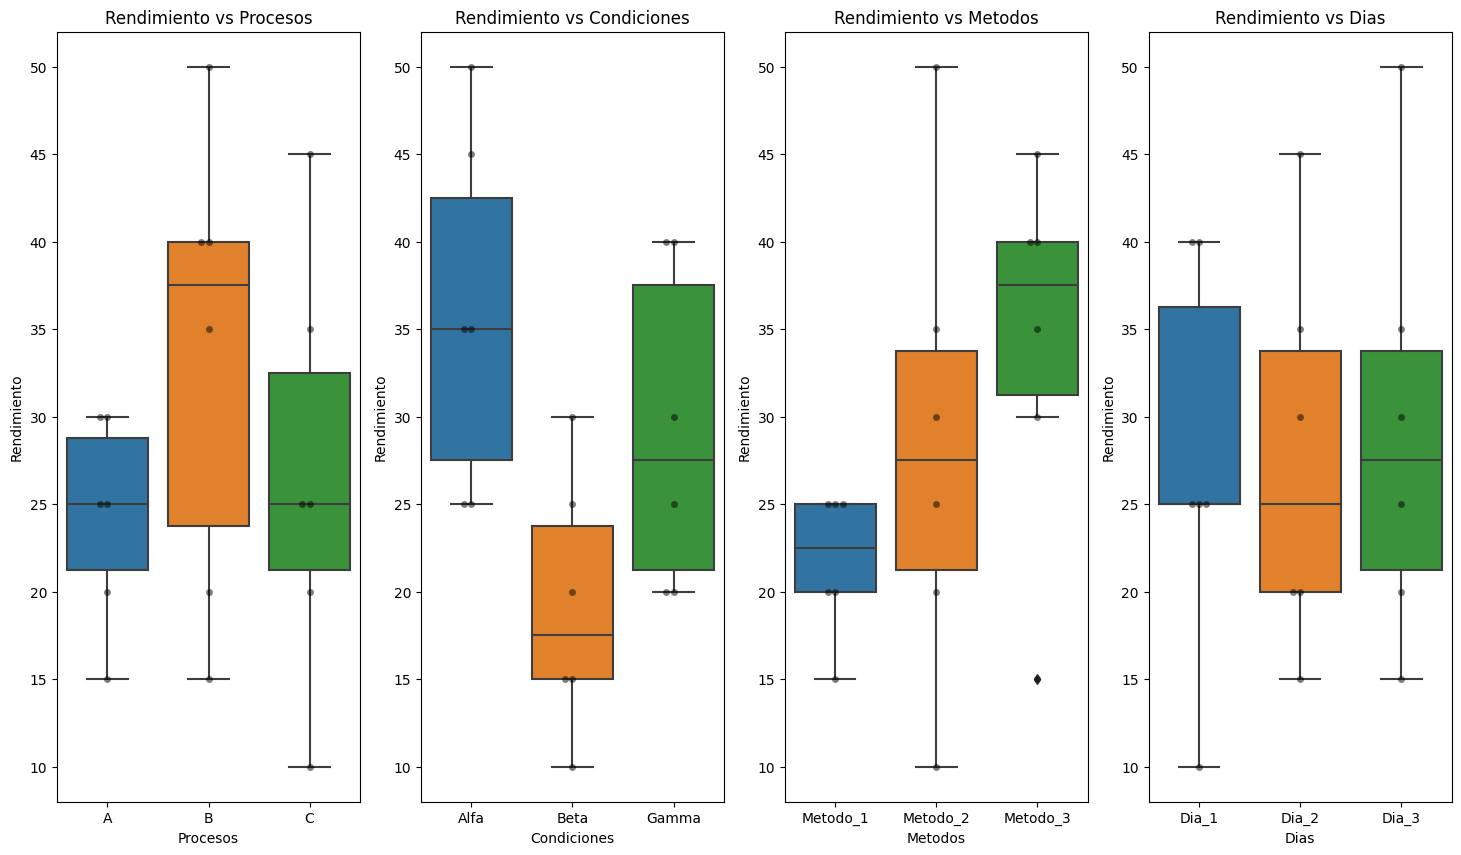

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 10))
axs[0].set_title('Rendimiento vs Procesos')
sns.boxplot(x="Procesos", y="Rendimiento", data=DCGL, ax=axs[0])
sns.swarmplot(x="Procesos", y="Rendimiento", data=DCGL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Rendimiento vs Condiciones')
sns.boxplot(x="Condiciones", y="Rendimiento", data=DCGL, ax=axs[1])
sns.swarmplot(x="Condiciones", y="Rendimiento", data=DCGL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Rendimiento vs Metodos')
sns.boxplot(x="Metodos", y="Rendimiento", data=DCGL, ax=axs[2])
sns.swarmplot(x="Metodos", y="Rendimiento", data=DCGL, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Rendimiento vs Dias')
sns.boxplot(x="Dias", y="Rendimiento", data=DCGL, ax=axs[3])
sns.swarmplot(x="Dias", y="Rendimiento", data=DCGL, color='black',
              alpha = 0.5, ax=axs[3])

## **5.6 Diagrama Bivariado SI es sposible dado que  hay replicas**

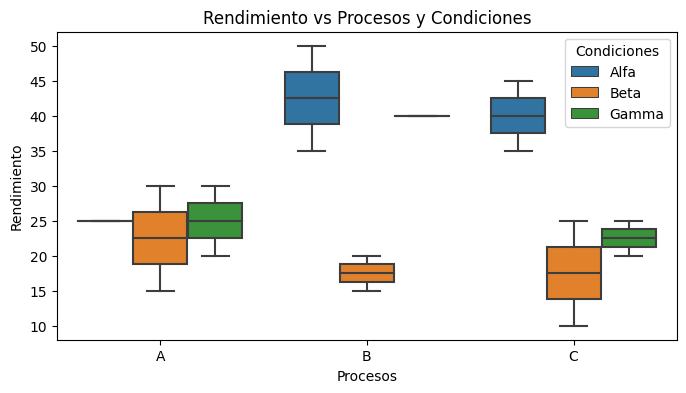

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Procesos y Condiciones')
sns.boxplot(x="Procesos", y="Rendimiento", hue='Condiciones', data=DCGL, ax=ax);

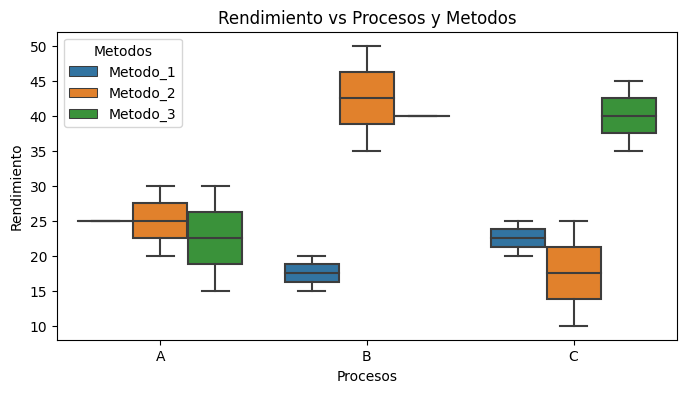

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Procesos y Metodos')
sns.boxplot(x="Procesos", y="Rendimiento", hue='Metodos', data=DCGL, ax=ax);

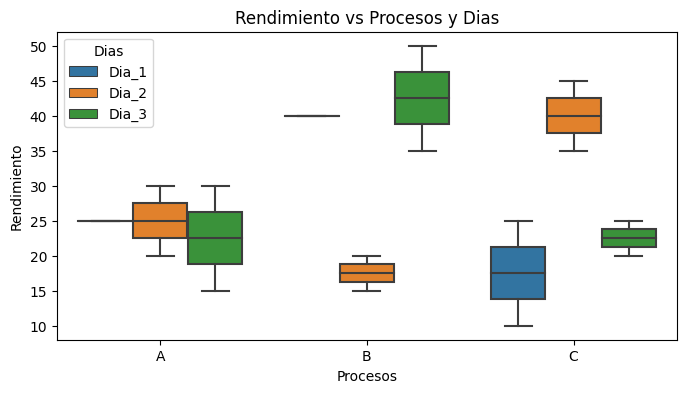

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Procesos y Dias')
sns.boxplot(x="Procesos", y="Rendimiento", hue='Dias', data=DCGL, ax=ax);

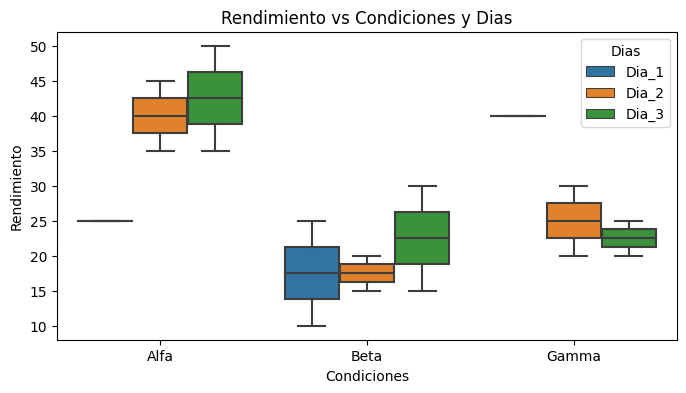

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Condiciones y Dias')
sns.boxplot(x="Condiciones", y="Rendimiento", hue='Dias', data=DCGL, ax=ax);

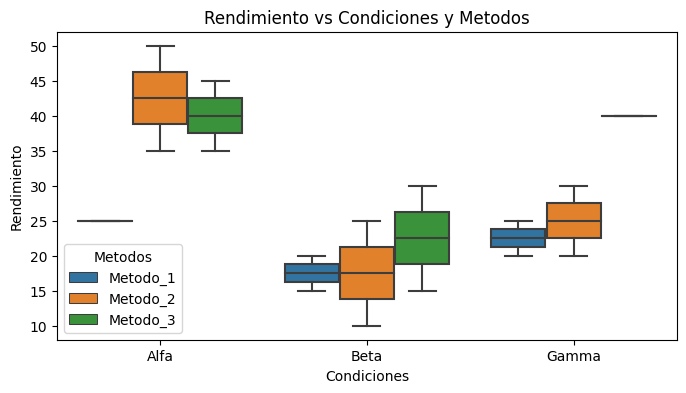

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Condiciones y Metodos')
sns.boxplot(x="Condiciones", y="Rendimiento", hue='Metodos', data=DCGL, ax=ax);

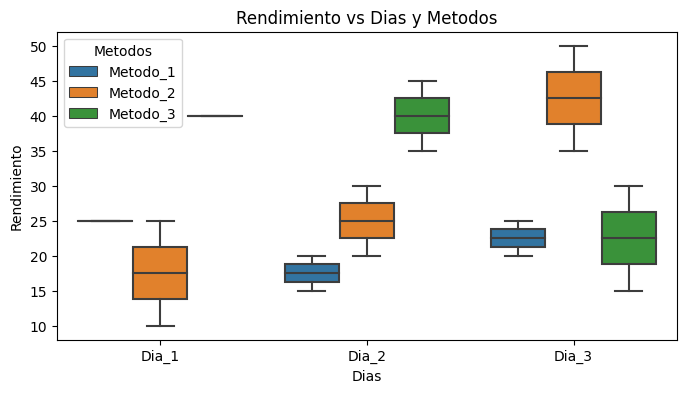

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Dias y Metodos')
sns.boxplot(x="Dias", y="Rendimiento", hue='Metodos', data=DCGL, ax=ax);

## **5.7 Análisis de Varianza Tipo II**

In [ ]:
# **4.7 Análisis de Varianza Tipo II**
modeloDCGL = ols("Rendimiento ~ Procesos + Condiciones+Metodos+Dias", data = DCGL).fit()
anova_result2 = sm.stats.anova_lm(modeloDCGL, typ=2)
print (anova_result2)

                 sum_sq   df         F    PR(>F)
Procesos     269.444444  2.0  2.621622  0.126722
Condiciones  844.444444  2.0  8.216216  0.009329
Metodos      469.444444  2.0  4.567568  0.042731
Dias          11.111111  2.0  0.108108  0.898678
Residual     462.500000  9.0       NaN       NaN


In [ ]:
anova_result2.T

,Procesos,Condiciones,Metodos,Dias,Residual
sum_sq,269.444444,844.444444,469.444444,11.111111,462.5
df,2.000000,2.000000,2.000000,2.000000,9.0
F,2.621622,8.216216,4.567568,0.108108,NaN
PR(>F),0.126722,0.009329,0.042731,0.898678,NaN


In [ ]:
print(modeloDCGL.summary())

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     3.878
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0296
Time:                        00:44:07   Log-Likelihood:                -54.757
No. Observations:                  18   AIC:                             127.5
Df Residuals:                       9   BIC:                             135.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               25.0000 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# **4.7 Análisis de Varianza Tipo IiI**
modeloDCL = ols("Rendimiento ~ Procesos + Condiciones+Metodos+Dias", data = DCGL).fit()
anova_result3 = sm.stats.anova_lm(modeloDCL, typ=3)
print (anova_result3)

                  sum_sq   df          F    PR(>F)
Intercept    1250.000000  1.0  24.324324  0.000811
Procesos      269.444444  2.0   2.621622  0.126722
Condiciones   844.444444  2.0   8.216216  0.009329
Metodos       469.444444  2.0   4.567568  0.042731
Dias           11.111111  2.0   0.108108  0.898678
Residual      462.500000  9.0        NaN       NaN


## **5.9 Comparaciones Múltiples:DCL - TGP**
### **a. Comparaciones Múltiples: TGP VS VITAMINAS**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,9.1667,0.3397,-7.204,25.5374,False
A,C,2.5,0.9174,-13.8707,18.8707,False
B,C,-6.6667,0.5535,-23.0374,9.704,False


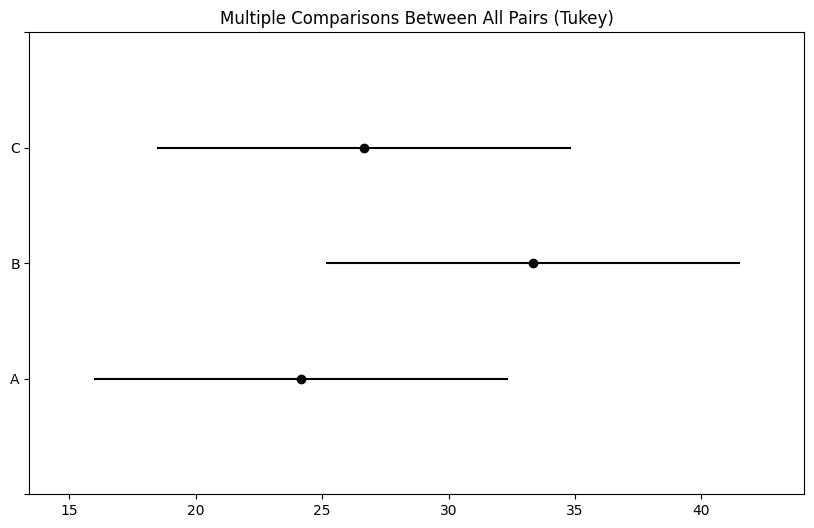

In [ ]:
### **a. Comparaciones Múltiples: TGP VS VITAMINAS**
tukey = pairwise_tukeyhsd(endog=DCGL["Rendimiento"],     # Data
                          groups=DCGL["Procesos"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **b. Comparaciones Múltiples: TGP VS Razas**

group1,group2,meandiff,p-adj,lower,upper,reject
Alfa,Beta,-16.6667,0.0152,-30.1496,-3.1837,True
Alfa,Gamma,-6.6667,0.425,-20.1496,6.8163,False
Beta,Gamma,10.0,0.1655,-3.483,23.483,False


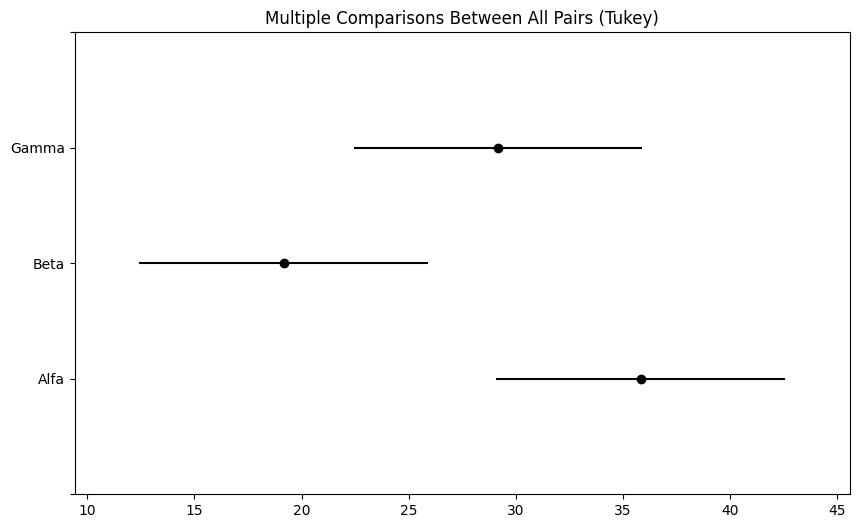

In [ ]:
### **b. Comparaciones Múltiples: TGP VS Razas**
tukey = pairwise_tukeyhsd(endog=DCGL["Rendimiento"],     # Data
                          groups=DCGL["Condiciones"],   # Groups
                          alpha=0.05)           # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **c. Comparaciones Múltiples: TGP VS Patologías**

group1,group2,meandiff,p-adj,lower,upper,reject
Metodo_1,Metodo_2,6.6667,0.5155,-8.761,22.0944,False
Metodo_1,Metodo_3,12.5,0.1225,-2.9277,27.9277,False
Metodo_2,Metodo_3,5.8333,0.5989,-9.5944,21.261,False


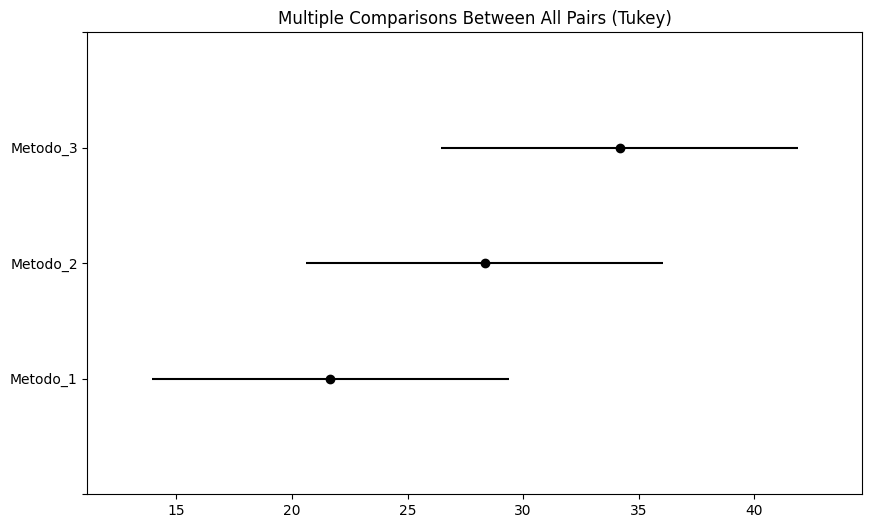

In [ ]:
### **c. Comparaciones Múltiples: TGP VS Patologías**
tukey = pairwise_tukeyhsd(endog=DCGL["Rendimiento"],     # Data
                          groups=DCGL["Metodos"],   # Groups
                          alpha=0.05)           # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **d. Comparaciones Múltiples: TGP VS Patologías**

group1,group2,meandiff,p-adj,lower,upper,reject
Dia_1,Dia_2,0.0,1.0,-17.5138,17.5138,False
Dia_1,Dia_3,1.6667,0.967,-15.8471,19.1804,False
Dia_2,Dia_3,1.6667,0.967,-15.8471,19.1804,False


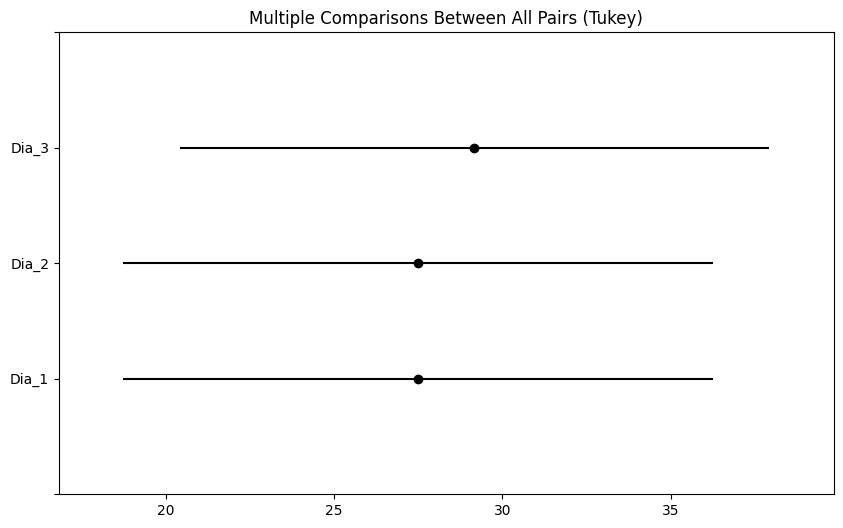

In [ ]:
### **d. Comparaciones Múltiples: TGP VS Patologías**
tukey = pairwise_tukeyhsd(endog=DCGL["Rendimiento"],     # Data
                          groups=DCGL["Dias"],   # Groups
                          alpha=0.05)           # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **e. Comparaciones Múltiples Forma 2**

In [ ]:
# **e. Comparaciones Múltiples Forma 2**
pg.pairwise_ttests(
    dv      = 'Rendimiento',
    within  = 'Procesos',
    subject = 'Condiciones',
    padjust = 'holm',
    data    = DCGL
)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packa

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Procesos,A,B,True,True,-1.287453,2.0,two-sided,0.326811,0.980433,holm,0.775,-0.749106
1,Procesos,A,C,True,True,-0.397360,2.0,two-sided,0.729499,0.980433,holm,0.5,-0.237635
2,Procesos,B,C,True,True,1.219989,2.0,two-sided,0.346803,0.980433,holm,0.746,0.415725


## **5.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
stats.shapiro(modeloDCGL.resid)

ShapiroResult(statistic=0.92339026927948, pvalue=0.14843641221523285)

# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

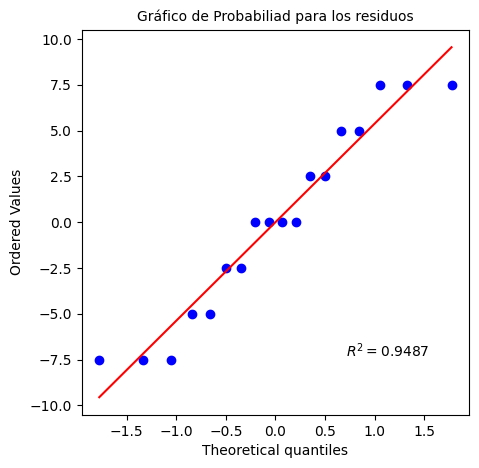

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDCGL.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **e. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DCGL['Rendimiento'][DCGL['Procesos'] == 'A'],
             DCGL['Rendimiento'][DCGL['Procesos'] == 'B'],
             DCGL['Rendimiento'][DCGL['Procesos'] == 'C']
             )

LeveneResult(statistic=1.0263157894736843, pvalue=0.3821632076630416)